In [1]:
 %reload_ext autoreload
 %autoreload 2

In [2]:

import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy.io
import os 
import comm_tools

In [4]:
# d_paths = [r'I:/LBM_RBC/test/test_new_500Ra5.0E+06_dt1.0E+00_Th1.0001647257468422/data/',
#            r'I:/LBM_RBC/test/test_new_500Ra5.0E+06_dt1.0E+00_Th1.0003834415482804/data/',
#            r'I:/LBM_RBC/test/test_new_500Ra5.0E+06_dt1.0E+00_Th1.0004016182315303/data/',
#            r'I:/LBM_RBC/test/test_new_500Ra5.0E+06_dt1.0E+00_Th1.000073124723441/data/'
#            ]
P = r'I:\LBM_RBC\loop_rho_rand_1e-1\3e6'
d_paths = [os.path.join(P, i, 'data') for i in os.listdir(P)]
T_chaos = []
U_chaos = []
data_idx = [10, 250]
for dp in d_paths:
    path_list = comm_tools.dir_list_glob(dp, '*.hdf5')
    # for p in path_list:
    dstT = comm_tools.load_h5data(path_list,'T', verbose=False)[:,data_idx[0], data_idx[1]]
    dstux = comm_tools.load_h5data(path_list,'ux', verbose=False)[:,data_idx[0], data_idx[1]]
    dstuy = comm_tools.load_h5data(path_list,'uy', verbose=False)[:,data_idx[0], data_idx[1]]
    T_chaos.append(dstT)
    U_chaos.append(np.sqrt(dstux**2 + dstuy**2))
T_chaos = np.array(T_chaos)
U_chaos = np.array(U_chaos)
# data_T = comm_tools.load_h5data()

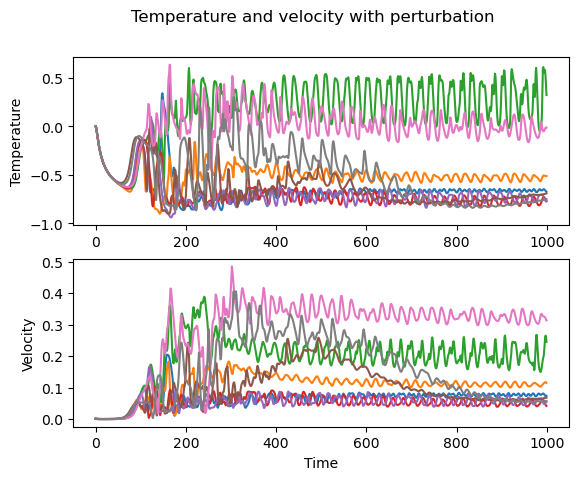

In [ ]:
dir_root = os.getcwd()
fig, axs = plt.subplots(2,1)
axs[0].plot(T_chaos.T)
axs[1].plot(U_chaos.T)
axs[1].set_xlabel('Time')
axs[0].set_ylabel('Temperature')
axs[1].set_ylabel('Velocity')
plt.suptitle('Temperature and velocity with perturbation')
plt.savefig('fig/perturb_T_v.pdf')
plt.show()

In [94]:
os.path.exists(path_dir)
path_dir

'I:\\LBM_RBC\\loop_rho_rand_1e-1\\data\\500Ra5.0E+05_dt1.0E+00_SD70322285\\data\\LBM_RBC_0800.hdf5'

In [11]:
os.path.exists(path_dir)
path_dir


'I:\\LBM_RBC\\Ras\\500Ra3.0E+06_dt1.0E+00\\data\\LBM_RBC_0800.hdf5'

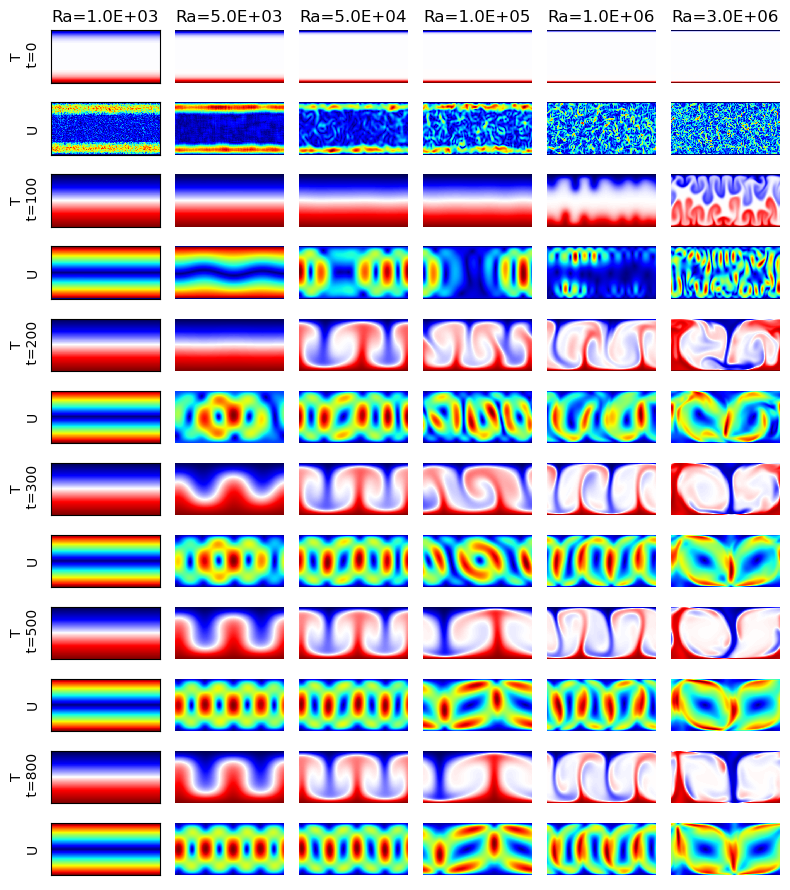

In [10]:
Ra_path_root= r'I:\LBM_RBC\Ras'
# Ra_paths = [os.path.join(Ra_path_root, i, 'data') for i in os.listdir(Ra_path_root)]
# Ra_paths = sorted(Ra_paths)

# num_pics = T_ts.shape[0]
# num_ = 5
Ras = [1e3, 5e3, 5e4, 1e5, 1e6, 3e6]
time_steps = [0, 100, 200, 300, 500, 800]
Ra_paths = [os.path.join(Ra_path_root, f'500Ra{i:.1E}_dt1.0E+00', 'data') for i in Ras]
num_ts = len(time_steps) * 2
num_Ras = len(Ras)
fig, axs = plt.subplots(num_ts, num_Ras, figsize=(8, num_Ras*1.5))

for j, Ra_p in enumerate(Ra_paths):
    T_ts = [] 
    U_ts = []
    for ts in time_steps:
        path_dir = os.path.join(Ra_p, f'LBM_RBC_{ts:04}.hdf5')
        # path_list = comm_tools.dir_list_glob(f, '*.hdf5')
        # for p in path_list:
        dstT = comm_tools.load_h5data([path_dir],'T', verbose=False)
        dstux = comm_tools.load_h5data([path_dir],'ux', verbose=False)
        dstuy = comm_tools.load_h5data([path_dir],'uy', verbose=False)
        T_ts.append(dstT)
        U_ts.append(np.sqrt(dstux**2 + dstuy**2))
    T_ts = np.vstack(T_ts)
    U_ts = np.vstack(U_ts)

    # num_pics = T_ts.shape[0]
    
    for i in range(int(num_ts/2)):
        i_idx = i*2
        j_idx = i*2 + 1
        # print(j_idx)
        axs[i_idx, j].pcolormesh(T_ts[i], cmap='seismic_r')
        axs[j_idx, j].pcolormesh(U_ts[i], cmap='jet')
        # axs[i_idx, j].set_xticks([])
        # axs[i_idx, j].set_yticks([])
        if j>0:
            axs[i_idx, j].axis('off')
            axs[j_idx, j].axis('off')
        else:
            axs[i_idx, j].set_xticks([])
            axs[j_idx, j].set_xticks([])
            axs[i_idx, j].set_yticks([])
            axs[j_idx, j].set_yticks([])
            # axs[0, 0].set_title('Temperature')
            # axs[0, 0].set_title('Temperature')
        axs[i_idx, 0].set_ylabel(f'T\n t={time_steps[i]}')
        axs[j_idx, 0].set_ylabel(f'U')
    axs[0, j].set_title(f'Ra={Ras[j]:.1E}')
    # axs[0, j].set_title('Velocity')
    # plt.axis('off')
plt.tight_layout()
plt.savefig('fig/Ras.png')
plt.show()

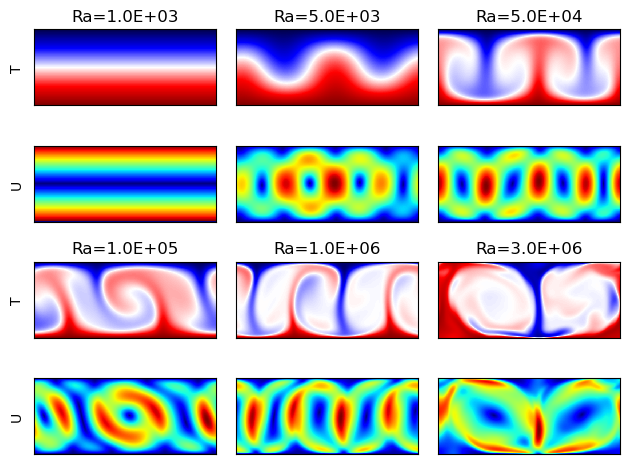

In [12]:
Ra_path_root= r'I:\LBM_RBC\Ras'
# Ra_paths = [os.path.join(Ra_path_root, i, 'data') for i in os.listdir(Ra_path_root)]
# Ra_paths = sorted(Ra_paths)


# num_ = 5
Ras = [1e3, 5e3, 5e4, 1e5, 1e6, 3e6]
time_steps = [300]

Ra_paths = [os.path.join(Ra_path_root, f'500Ra{i:.1E}_dt1.0E+00', 'data') for i in Ras]
num_ts = len(time_steps) * 2
num_Ras = len(Ras)
fig, axs = plt.subplots(4, 3)

for j, Ra_p in enumerate(Ra_paths):
    T_ts = [] 
    U_ts = []
    for ts in time_steps:
        path_dir = os.path.join(Ra_p, f'LBM_RBC_{ts:04}.hdf5')
        # path_list = comm_tools.dir_list_glob(f, '*.hdf5')
        # for p in path_list:
        dstT = comm_tools.load_h5data([path_dir],'T', verbose=False)
        dstux = comm_tools.load_h5data([path_dir],'ux', verbose=False)
        dstuy = comm_tools.load_h5data([path_dir],'uy', verbose=False)
        T_ts.append(dstT)
        U_ts.append(np.sqrt(dstux**2 + dstuy**2))
    T_ts = np.vstack(T_ts)
    U_ts = np.vstack(U_ts)
    
    for i in range(int(num_ts/2)):
        
        r = int((j)//3)
        i_idx = i + r*2
        j_idx = j % 3
        # print(j_idx)
        axs[i_idx, j_idx].pcolormesh(T_ts[i], cmap='seismic_r')
        axs[i_idx+1, j_idx].pcolormesh(U_ts[i], cmap='jet')
        # axs[i_idx, j].set_xticks([])
        # axs[i_idx, j].set_yticks([])
        # if j>0:
        #     axs[i_idx, j_idx].axis('off')
        #     # axs[j_idx, j].axis('off')
        # else:
        axs[i_idx, j_idx].set_xticks([])
        # axs[j_idx, j_idx].set_xticks([])
        axs[i_idx, j_idx].set_yticks([])
        axs[i_idx+1, j_idx].set_xticks([])
        # axs[j_idx, j_idx].set_xticks([])
        axs[i_idx+1, j_idx].set_yticks([])
            # axs[j_idx, j_idx].set_yticks([])
            # axs[0, 0].set_title('Temperature')
            # axs[0, 0].set_title('Temperature')
        axs[i_idx, 0].set_ylabel(f'T')
        axs[j_idx+1, 0].set_ylabel(f'U')
    if j <=2:
        axs[0, j_idx].set_title(f'Ra={Ras[j]:.1E}')
    if j>2:
        axs[2, j_idx%3].set_title(f'Ra={Ras[j]:.1E}')
    # axs[0, j].set_title('Velocity')
    # plt.axis('off')
plt.tight_layout()
plt.savefig('fig/Ras300.png')
plt.show()

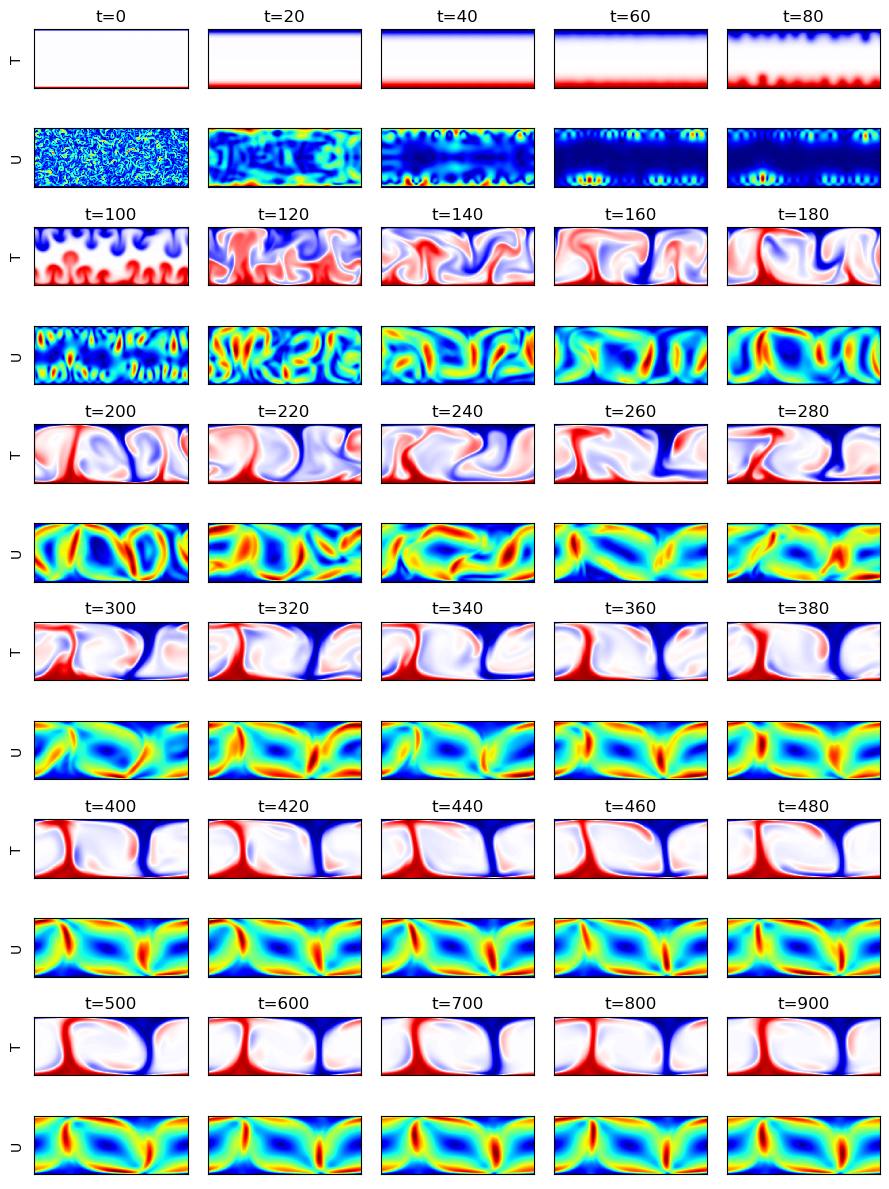

In [13]:
path_root= [r'I:\LBM_RBC\loop_rho_rand_1e-1\data\500Ra3.0E+06_dt1.0E+00_SD1830312345\data']
time_steps = np.concatenate([np.arange(0, 500, 20), np.arange(500, 1000, 100)])
num_ts = len(time_steps) * 2
fig, axs = plt.subplots(np.ceil(num_ts/5).astype(int), 5, figsize=(9, 12))
axs = axs.flatten()
for j, p in enumerate(path_root):
    T_ts = [] 
    U_ts = []
    for ts in time_steps:
        path_dir = os.path.join(p, f'LBM_RBC_{ts:04}.hdf5')
        # path_list = comm_tools.dir_list_glob(f, '*.hdf5')
        # for p in path_list:
        dstT = comm_tools.load_h5data([path_dir],'T', verbose=False)
        dstux = comm_tools.load_h5data([path_dir],'ux', verbose=False)
        dstuy = comm_tools.load_h5data([path_dir],'uy', verbose=False)
        T_ts.append(dstT)
        U_ts.append(np.sqrt(dstux**2 + dstuy**2))
    T_ts = np.vstack(T_ts)
    U_ts = np.vstack(U_ts)
    
    for i in range(int(num_ts/2)):
        
        i_idx =  i%5 + (i//5)*10

        j_idx = i_idx+5

        axs[i_idx].pcolormesh(T_ts[i], cmap='seismic_r')
        axs[j_idx].pcolormesh(U_ts[i], cmap='jet')
  
        axs[i_idx].set_xticks([])

        axs[i_idx].set_yticks([])
        axs[j_idx].set_xticks([])
 
        axs[j_idx].set_yticks([])
        
        if i_idx%5 == 0:
            axs[i_idx].set_ylabel('T')
            axs[i_idx+5].set_ylabel('U')
        
        axs[i_idx].set_title(f't={time_steps[i]}')   
plt.tight_layout()
plt.savefig('fig/Ts.png')
plt.show()